# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ali Astra Mikail
- **Email:** aliastra05@gmail.com@gmail.com
- **Username Dicoding:** aliastrmkl

## Menentukan Pertanyaan Bisnis

- Bagaimana pola jumlah pengguna layanan bike-sharing dalam beberapa tahun terakhir?
- Bagaimana perbedaan dalam jumlah pengguna harian layanana bike-sharing pada hari kerja (workingday) dan hari libur (holiday)?

## Import Semua Packages/Library yang Digunakan

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

## Data Wrangling

### Gathering Data

In [2]:
# load dataset
day_df = pd.read_csv("https://raw.githubusercontent.com/aliastrm/bikesharing_dataset/main/day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/aliastrm/bikesharing_dataset/main/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
bike_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="inner",
    on="dteday",
    suffixes=('_daily', '_hourly')
)
print(bike_df.shape)
bike_df.loc[bike_df["dteday"].isnull()]
bike_df.head()

(17379, 32)


,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
bike_df

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

In [6]:
# check data types
hour_df.info()
day_df.info()
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [7]:
# check missing values
bike_df.isna().sum()

,0
instant_daily,0
dteday,0
season_daily,0
yr_daily,0
mnth_daily,0
holiday_daily,0
weekday_daily,0
workingday_daily,0
weathersit_daily,0
temp_daily,0


In [8]:
# check duplicated values
bike_df.duplicated().sum()

0

In [9]:
bike_df.describe(include="all")

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [10]:
# sanity check
print(bike_df.shape)

(17379, 32)


### Cleaning Data

In [11]:
# konversi kolom 'dteday' ke tipe data datetime
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'])
bike_df.head()

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
# koreksi 'weekday'
bike_df['weekday'] = bike_df['dteday'].dt.day_name()
bike_df.head()

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly,weekday
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.81,0.0,3,13,16,Saturday
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.22,0.2727,0.80,0.0,8,32,40,Saturday
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.22,0.2727,0.80,0.0,5,27,32,Saturday
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.75,0.0,3,10,13,Saturday
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.75,0.0,0,1,1,Saturday


In [13]:
bike_df.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

In [14]:
# sanity check
bike_df.dtypes

,0
instant_daily,int64
dteday,datetime64[ns]
season_daily,int64
yr_daily,int64
mnth_daily,int64
holiday_daily,int64
weekday_daily,int64
workingday_daily,int64
weathersit_daily,int64
temp_daily,float64


In [15]:
bike_df.to_csv("bikeshare_cleaned.csv", index=False)

In [16]:
bike_df.describe(include="all")

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly,weekday
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2512
mean,367.172622,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,185.000000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,367.000000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,549.000000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,...,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN


### Explore

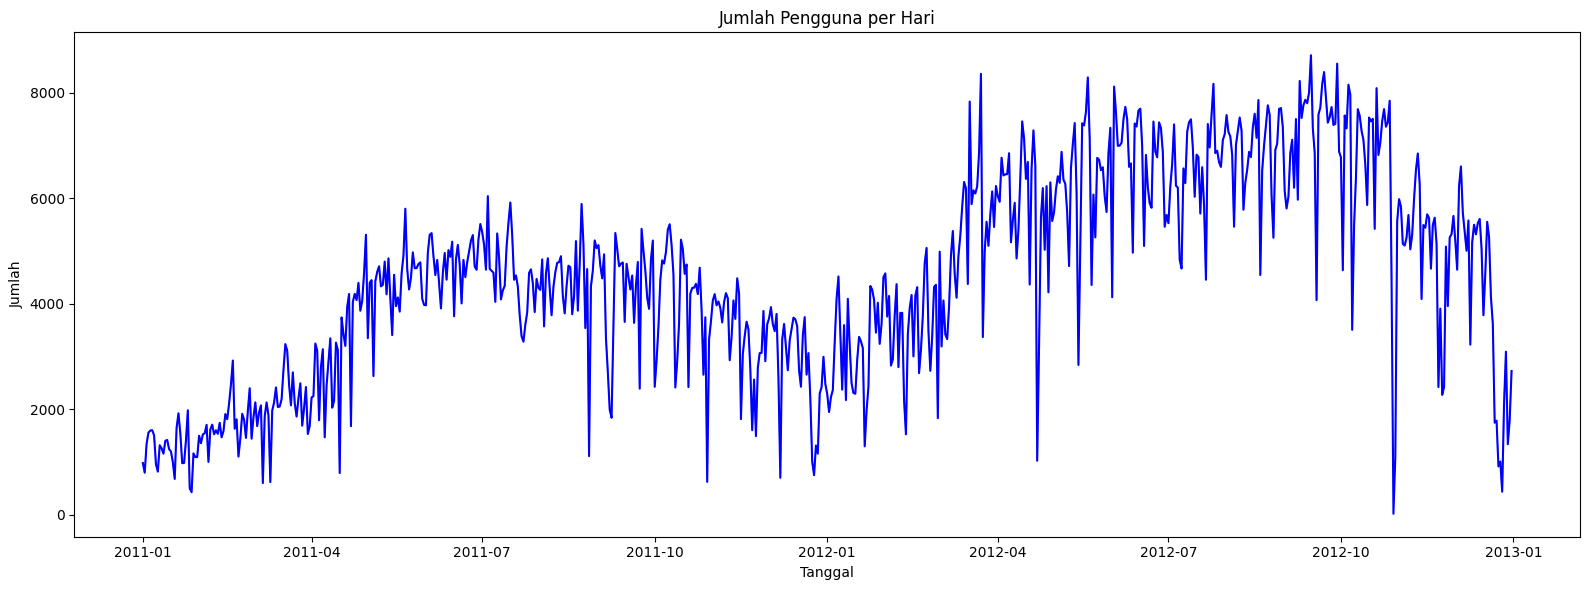

In [17]:
# TIME SERIES PLOT - Waktu Pengguna Bikeshare

# Membuat gambar dengan ukuran tertentu
plt.figure(figsize=(16, 6))

# Membuat plot garis menggunakan fungsi sns.lineplot()
sns.lineplot(x="dteday", y="cnt_daily", data=bike_df, color='blue')

# Set label dan judul ke plot
plt.xlabel("Tanggal")
plt.ylabel("Jumlah")
plt.title("Jumlah Pengguna per Hari")

# Menampilkan plot
plt.tight_layout()
plt.show()


- Jumlah pengguna pada tahun 2012 lebih tinggi daripada tahun 2011.
- Pada awal setiap tahun, jumlah perjalanan rendah, kemudian mulai meningkat pada pertengahan tahun, lalu menurun kembali mendekati akhir tahun.

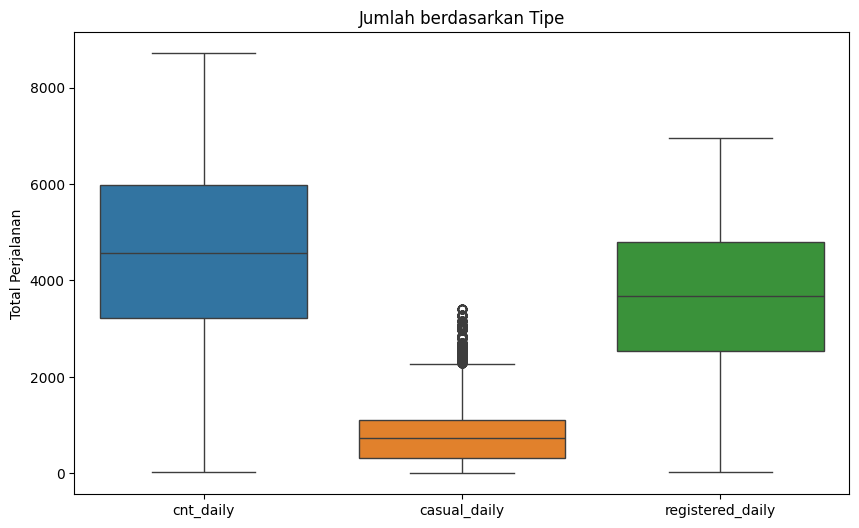

In [18]:
# BOXPLOT - Pengguna Bikeshare berdasarkan tipenya
# Membuat gambar dengan ukuran tertentu
plt.figure(figsize=(10, 6))

# Membuat boxplot untuk variabel 'cnt', 'casual', dan 'registered'
sns.boxplot(data=bike_df[['cnt_daily', 'casual_daily', 'registered_daily']])

# Menambahkan label dan judul ke plot
plt.ylabel("Total Perjalanan")
plt.title("Jumlah berdasarkan Tipe")

# Menampilkan plot
plt.show()

- Jumlah perjalanan bikeshare bervariasi berdasarkan keanggotaan
- Jumlah perjalanan bikeshare yang terdaftar lebih banyak daripada yang tidak terdaftar

In [19]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

<ipython-input-20-7d25324537fc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-20-7d25324537fc>:4: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


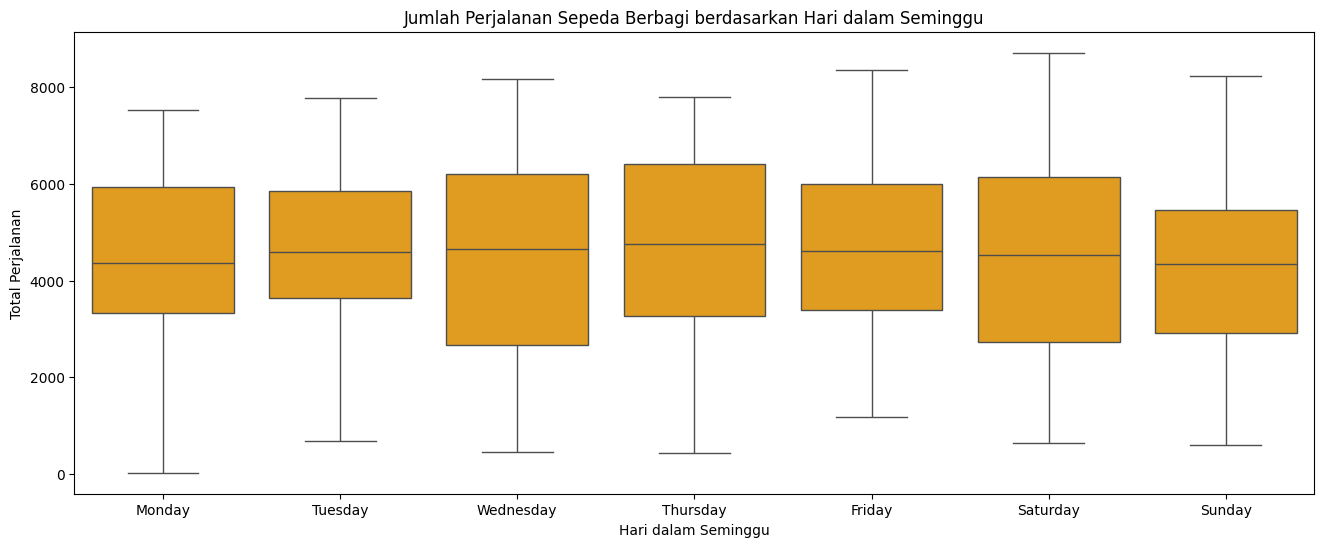

In [20]:
# BOXPLOT - Pengguna Bikeshare berdasarkan Hari
plt.figure(figsize=(16, 6))

sns.boxplot(
    x="weekday",
    y="cnt_daily",
    data=bike_df,
    palette=["orange"],
    order=day_order
)

plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Total Perjalanan")
plt.title("Jumlah Perjalanan Sepeda Berbagi berdasarkan Hari dalam Seminggu")

plt.show()

<ipython-input-21-50c0d3030c17>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-21-50c0d3030c17>:6: UserWarning: 
The palette list has fewer values (1) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


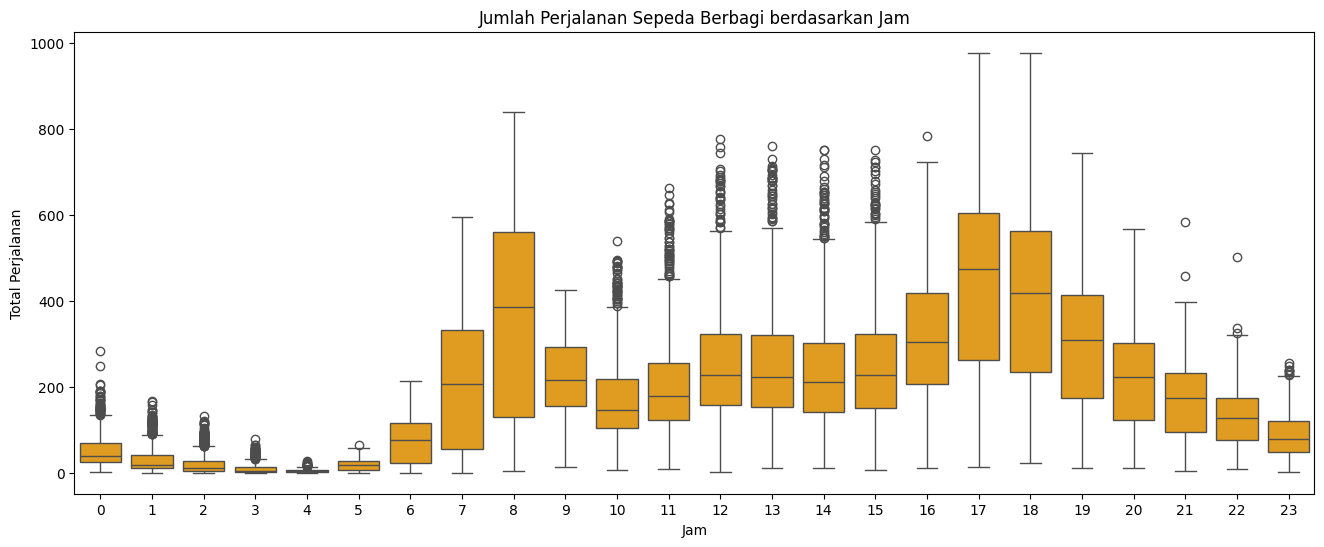

In [21]:
# BOXPLOT - Pengguna Bikeshare berdasarkan Jam
# Membuat gambar dengan ukuran tertentu
plt.figure(figsize=(16, 6))

# Membuat boxplot menggunakan fungsi sns.boxplot()
sns.boxplot(
    x="hr",
    y="cnt_hourly",
    data=bike_df,
    palette=["orange"]
)

# Menambahkan label dan judul ke plot
plt.xlabel("Jam")
plt.ylabel("Total Perjalanan")
plt.title("Jumlah Perjalanan Sepeda Berbagi berdasarkan Jam")

# Menampilkan plot
plt.show()


- Dari tengah malam hingga subuh, jumlah perjalanan bikeshare adalah yang terendah
- Perjalanan mulai meningkat di pagi hari, dan mencapai puncaknya pada pukul 8.00
- Perjalanan menurun pada siang hari, tetapi mulai pukul 16.00 mulai meningkat lagi dan mencapai puncaknya pada pukul 17.00. Setelah itu jumlah perjalanan bikeshare menurun sepanjang malam

<ipython-input-22-6ec002b75816>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


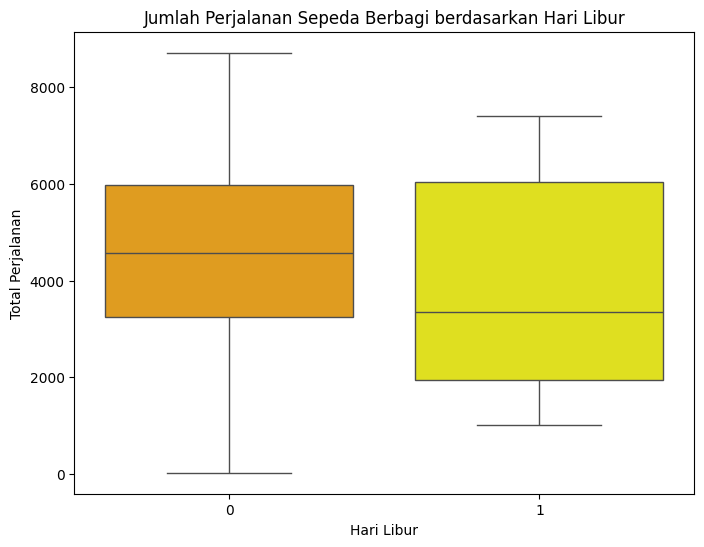

Jumlah pengguna sepeda berbagi berdasarkan hari libur:
holiday_daily
0    16879
1      500
Name: count, dtype: int64


In [22]:
# BOXPLOT - Pengguna Bikeshare berdasarkan Holiday
# Membuat gambar dengan ukuran tertentu
plt.figure(figsize=(8, 6))

# Membuat boxplot menggunakan fungsi sns.boxplot()
sns.boxplot(
    x="holiday_daily",
    y="cnt_daily",
    data=bike_df,
    palette=["orange", "yellow"]
)

# Menambahkan label dan judul ke plot
plt.xlabel("Hari Libur")
plt.ylabel("Total Perjalanan")
plt.title("Jumlah Perjalanan Sepeda Berbagi berdasarkan Hari Libur")

# Menampilkan plot
plt.show()

# Menampilkan jumlah pengguna sepeda berbagi berdasarkan hari libur atau tidak
print('Jumlah pengguna sepeda berbagi berdasarkan hari libur:')
print(bike_df['holiday_daily'].value_counts())

- Jumlah perjalanan bikeshare pada hari kerja lebih tinggi daripada hari libur

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah pengguna layanan bike-sharing dalam beberapa tahun terakhir?

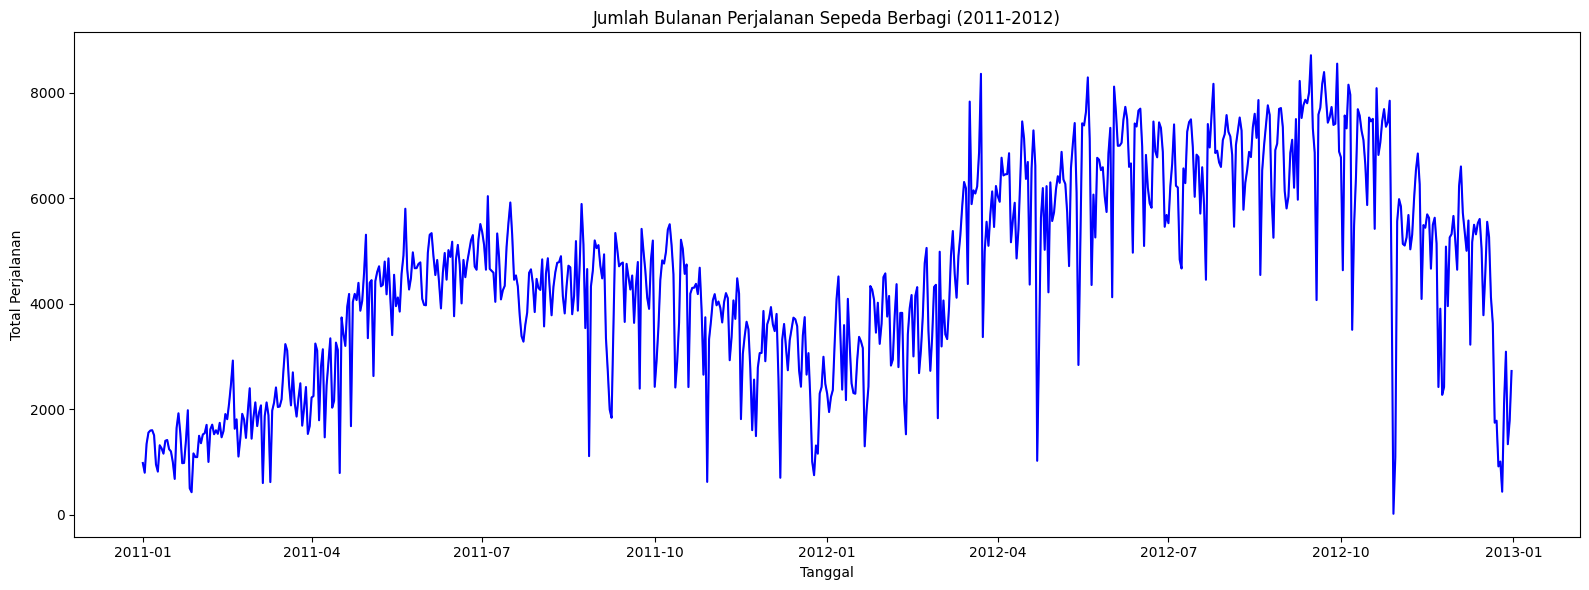

In [23]:
# Membuat gambar dengan ukuran tertentu
plt.figure(figsize=(16, 6))

# Membuat plot garis menggunakan fungsi sns.lineplot()
sns.lineplot(x="dteday", y="cnt_daily", data=bike_df, color='blue')

# Menambahkan label dan judul ke plot
plt.xlabel("Tanggal")
plt.ylabel("Total Perjalanan")
plt.title("Jumlah Bulanan Perjalanan Sepeda Berbagi (2011-2012)")

# Menampilkan plot
plt.tight_layout()
plt.show()

Plot tersebut adalah Line Plot. Line plot digunakan untuk memvisualisasikan hubungan atau tren antara dua variabel berkelanjutan. Dalam konteks ini, line plot digunakan untuk menunjukkan perubahan jumlah pengguna layanan sepeda berbagi (cnt) seiring berjalannya waktu.

In [24]:
# Resample - menggabungkan data berbasis deret waktu
# (dari harian ke bulanan) agar lebih mudah diinterpretasikan

monthly_users_df = bike_df.resample(rule='M', on='dteday').agg({
    "casual_daily": "sum",
    "registered_daily": "sum",
    "cnt_daily": "sum"
})

monthly_users_df.head()

<ipython-input-24-3764645ea195>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_users_df = bike_df.resample(rule='M', on='dteday').agg({


,casual_daily,registered_daily,cnt_daily
dteday,,,
2011-01-31,71251,799718,870969
2011-02-28,146161,973236,1119397
2011-03-31,302994,1208517,1511511
2011-04-30,535449,1738083,2273532
2011-05-31,745200,2514504,3259704


In [25]:
monthly_users_df.index = monthly_users_df.index.strftime('%b-%y')
monthly_users_df.head()

,casual_daily,registered_daily,cnt_daily
dteday,,,
Jan-11,71251,799718,870969
Feb-11,146161,973236,1119397
Mar-11,302994,1208517,1511511
Apr-11,535449,1738083,2273532
May-11,745200,2514504,3259704


In [26]:
monthly_users_df = monthly_users_df.reset_index()
monthly_users_df = monthly_users_df.rename(columns={'dteday': 'yearmonth'})
monthly_users_df.head()

,yearmonth,casual_daily,registered_daily,cnt_daily
0,Jan-11,71251,799718,870969
1,Feb-11,146161,973236,1119397
2,Mar-11,302994,1208517,1511511
3,Apr-11,535449,1738083,2273532
4,May-11,745200,2514504,3259704


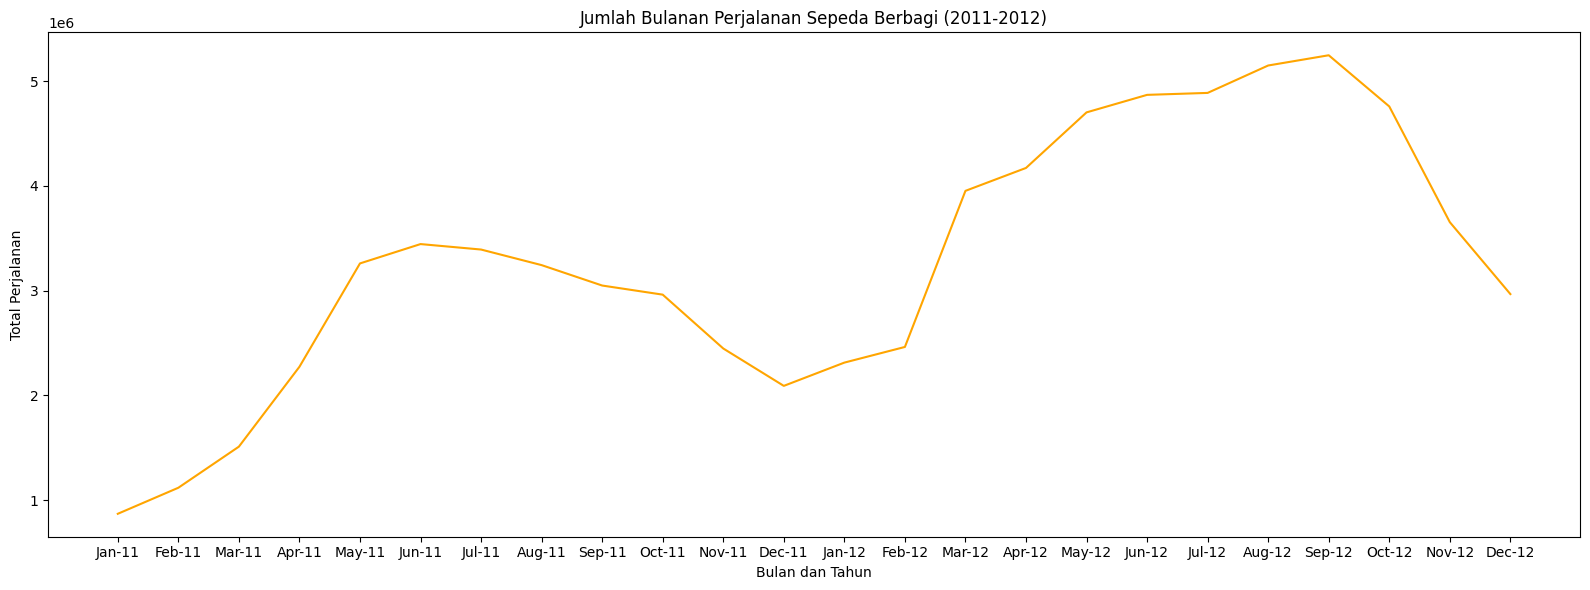

In [27]:
# Menampilkan kembali dalam bentuk line plot
plt.figure(figsize=(16, 6))

sns.lineplot(x="yearmonth", y="cnt_daily", data=monthly_users_df, color='orange')

plt.xlabel("Bulan dan Tahun")
plt.ylabel("Total Perjalanan")
plt.title("Jumlah Bulanan Perjalanan Sepeda Berbagi (2011-2012)")

plt.tight_layout()
plt.show()

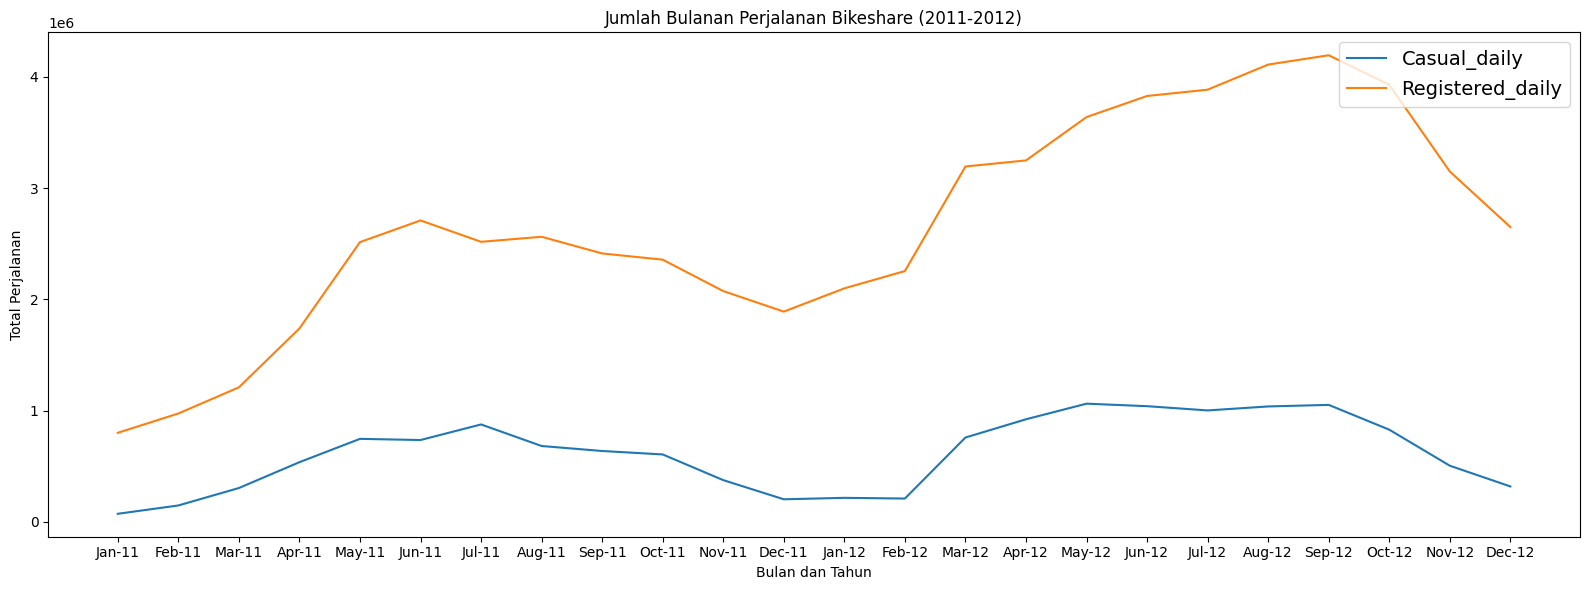

In [28]:
# Menampilkan line plot untuk pengguna bisa dan pengguna terdaftar
plt.figure(figsize=(16, 6))

# Membuat line plot menggunakan fungsi sns.lineplot()
sns.lineplot(x="yearmonth", y="casual_daily", data=monthly_users_df, label='Casual_daily')
sns.lineplot(x="yearmonth", y="registered_daily", data=monthly_users_df, label='Registered_daily')

# Menambahkan label dan judul ke plot
plt.xlabel("Bulan dan Tahun")
plt.ylabel("Total Perjalanan")
plt.title("Jumlah Bulanan Perjalanan Bikeshare (2011-2012)")

# Menambahkan legenda ke plot
plt.legend(loc='upper right', fontsize=14)

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insight**
- Jumlah perjalanan bikeshare pada tahun 2012 lebih tinggi dibandingkan tahun 2011.
- Jumlah perjalanan bikeshare biasanya dimulai dengan jumlah yang rendah pada awal tahun, kemudian mulai meningkat pada kuartal kedua, lalu mulai menurun pada kuartal keempat.
- Jumlah perjalanan bikeshare yang terdaftar lebih tinggi daripada perjalanan biasa, meskipun keduanya menunjukkan tren yang sama sepanjang tahun.

### Pertanyaan 2: Bagaimana perbedaan dalam jumlah pengguna harian layanana bike-sharing pada hari kerja (workingday) dan hari libur (holiday)?

In [29]:
weekday_users_df = bike_df.resample(rule='M', on='dteday').agg({
    "weekday_daily": "sum",
    "holiday_daily": "sum"
})

weekday_users_df.head()

<ipython-input-29-6b2ef286a729>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  weekday_users_df = bike_df.resample(rule='M', on='dteday').agg({


,weekday_daily,holiday_daily
dteday,,
2011-01-31,2018,24
2011-02-28,1957,24
2011-03-31,2202,0
2011-04-30,2279,24
2011-05-31,2088,24


In [30]:
weekday_users_df.index = weekday_users_df.index.strftime('%b-%y')
weekday_users_df.head()

,weekday_daily,holiday_daily
dteday,,
Jan-11,2018,24
Feb-11,1957,24
Mar-11,2202,0
Apr-11,2279,24
May-11,2088,24


In [31]:
weekday_users_df = weekday_users_df.reset_index()
weekday_users_df = weekday_users_df.rename(columns={'dteday': 'yearmonth'})
weekday_users_df.head()

,yearmonth,weekday_daily,holiday_daily
0,Jan-11,2018,24
1,Feb-11,1957,24
2,Mar-11,2202,0
3,Apr-11,2279,24
4,May-11,2088,24


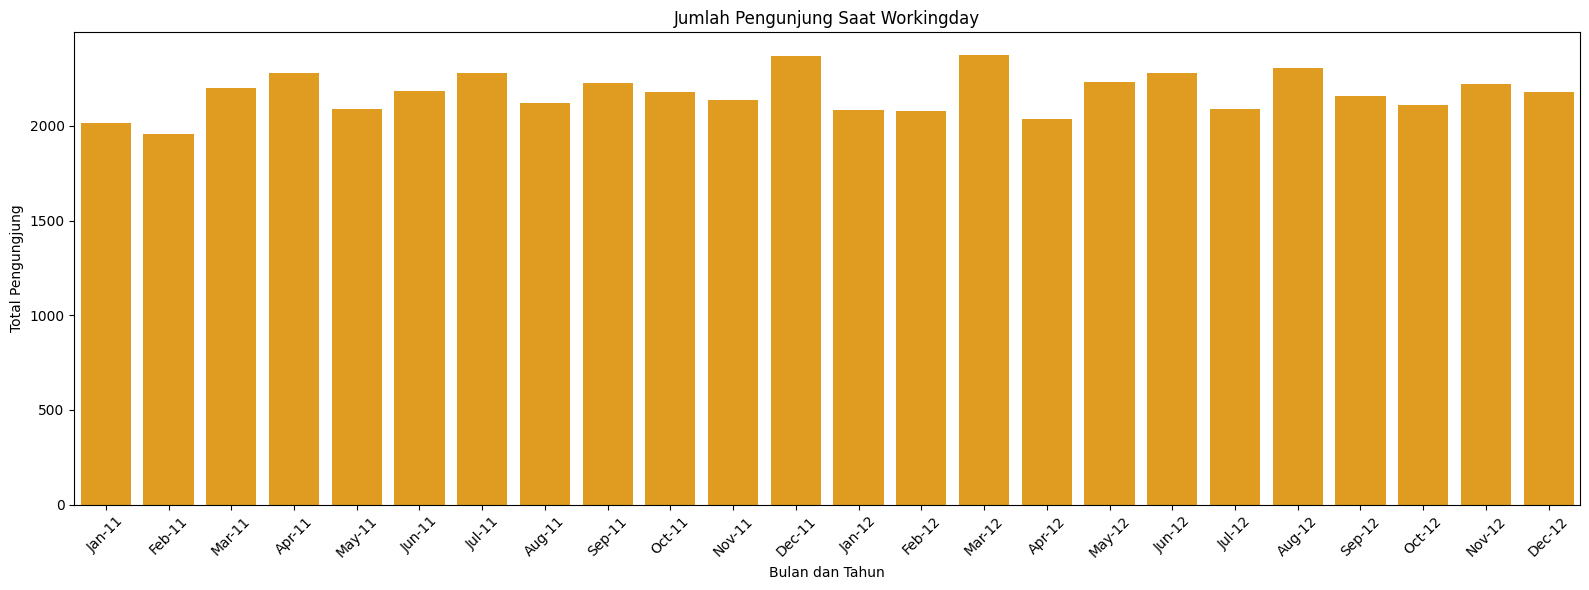

In [32]:
# Menampilkan dalam bentuk bar plot
plt.figure(figsize=(16, 6))

sns.barplot(x="yearmonth", y="weekday_daily", data=weekday_users_df, color='orange')

plt.xlabel("Bulan dan Tahun")
plt.ylabel("Total Pengungjung")
plt.title("Jumlah Pengunjung Saat Workingday")

plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar tidak tumpang tindih
plt.tight_layout()
plt.show()


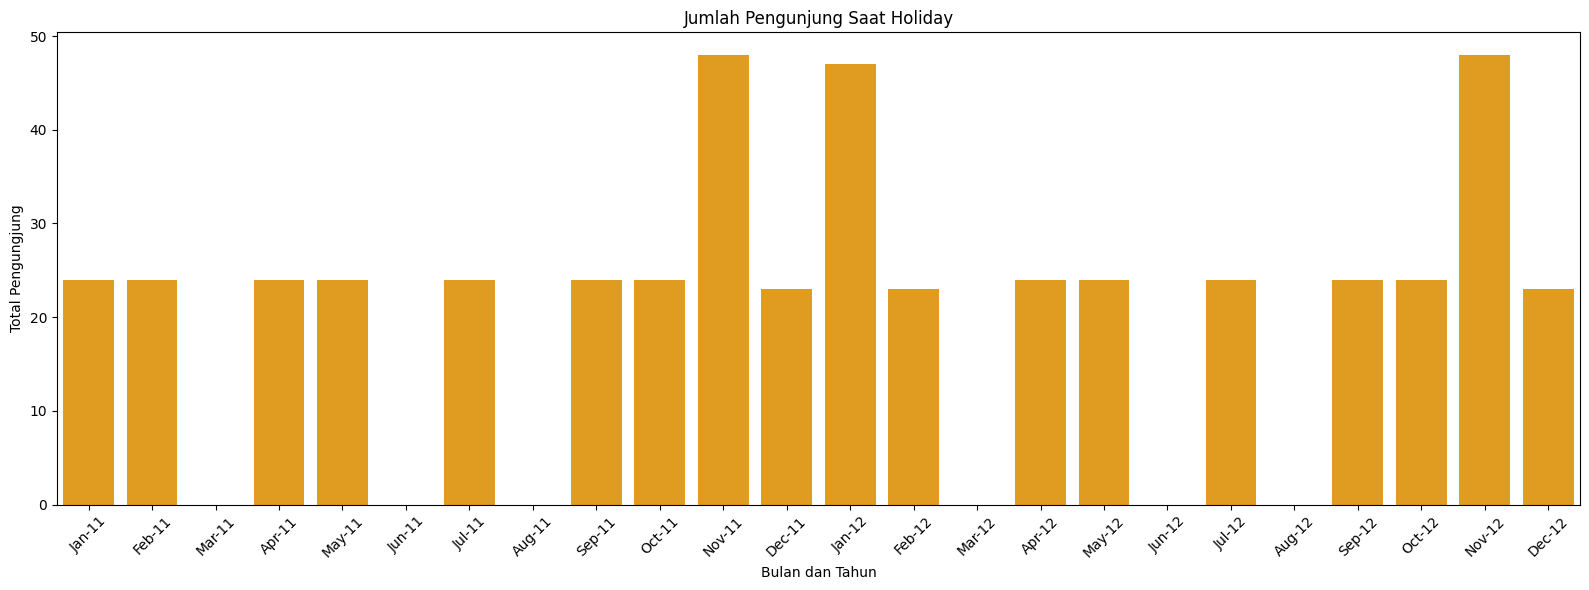

In [33]:
# Menampilkan dalam bentuk bar plot
plt.figure(figsize=(16, 6))

sns.barplot(x="yearmonth", y="holiday_daily", data=weekday_users_df, color='orange')

plt.xlabel("Bulan dan Tahun")
plt.ylabel("Total Pengungjung")
plt.title("Jumlah Pengunjung Saat Holiday")

plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar tidak tumpang tindih
plt.tight_layout()
plt.show()


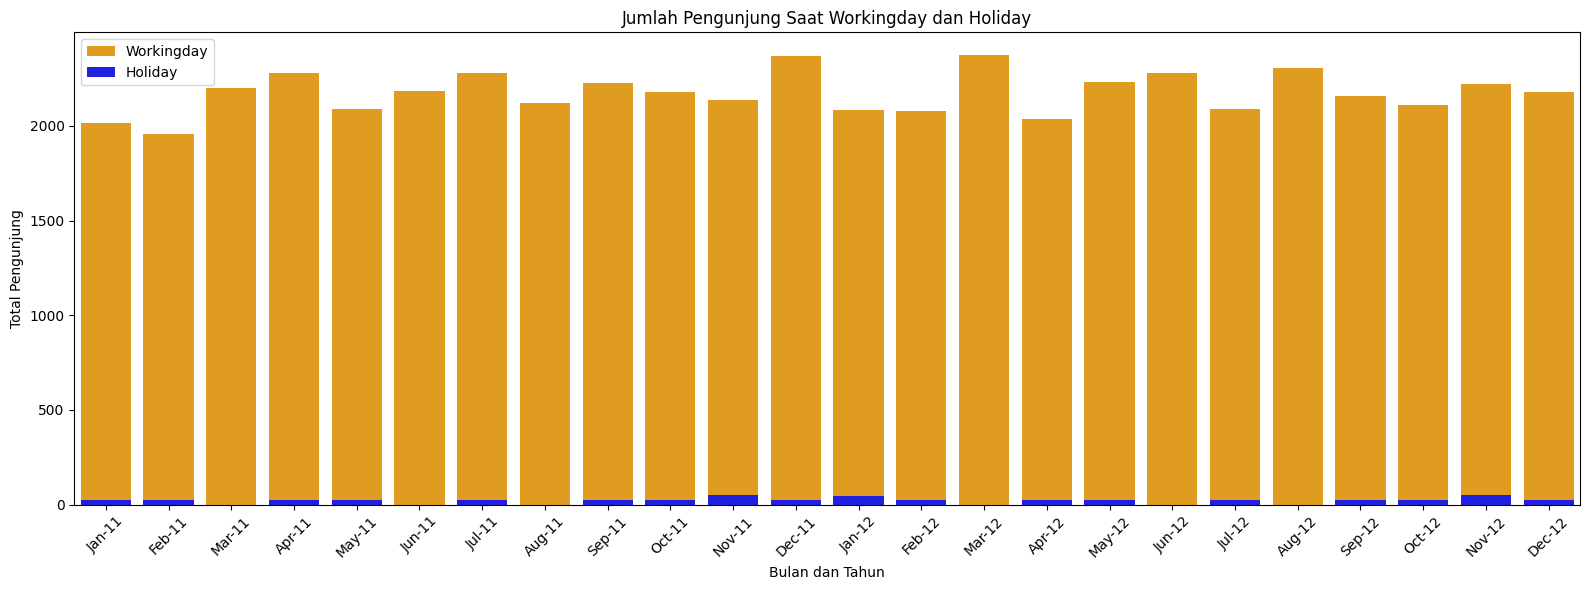

In [34]:

# Menentukan ukuran plot
plt.figure(figsize=(16, 6))

# Menggambar bar plot pertama untuk 'weekday_daily'
sns.barplot(x="yearmonth", y="weekday_daily", data=weekday_users_df, color='orange', label='Workingday')

# Menggambar bar plot kedua untuk 'holiday_daily'
sns.barplot(x="yearmonth", y="holiday_daily", data=weekday_users_df, color='blue', label='Holiday')

# Menambahkan label sumbu x, sumbu y, dan judul plot
plt.xlabel("Bulan dan Tahun")
plt.ylabel("Total Pengunjung")
plt.title("Jumlah Pengunjung Saat Workingday dan Holiday")

# Memutar label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45)

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


<ipython-input-35-1dfd6899c596>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="workingday_daily", y="cnt_daily", data=bike_df, palette=["orange", "yellow"])


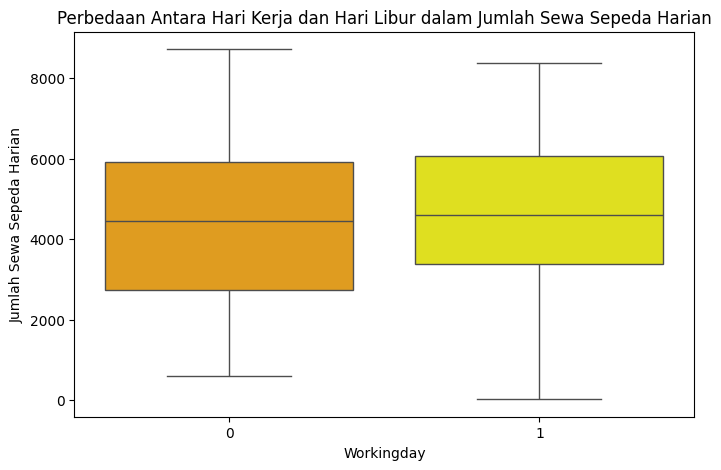

In [35]:
# Perbandingan hari kerja dan hari libur
plt.figure(figsize=(8, 5))
sns.boxplot(x="workingday_daily", y="cnt_daily", data=bike_df, palette=["orange", "yellow"])
plt.title("Perbedaan Antara Hari Kerja dan Hari Libur dalam Jumlah Sewa Sepeda Harian")
plt.xlabel("Workingday")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

## Teknik Analisis Lanjutan

### Clustering

Melakukan grouping berdasarkan holiday untuk mengetahui banyak jumlah pengguna pada waktu holiday

In [36]:
hour_df.groupby(by="holiday").cnt.nunique().sort_values(ascending=False)

,cnt
holiday,
0,869
1,276


Kita dapat mengidentifikasi kelompok pengguna yang lebih cenderung menyewa sepeda pada hari-hari biasa bukan pada musim liburan

Selanjutnya kita akan melihat jumlah pengguna pada saat weekday. Namun, sebelum itu kita akan ubah merename isi kolom weekday agar lebih mudah dipahami.

In [37]:
hour_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

<ipython-input-37-f5b654341593>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)


Setelah di rename maka kita dapat meliha persebaran harinya dengan lebih jelas karena sudah disesuaikan. Berikut merupakan hasil pengelompokan pada kolom weekday beserta jumlah pengunjung pada hari tersebut

In [38]:
hour_df.groupby(by="weekday").agg({
    "cnt": ["count"]})

,cnt
,count
weekday,
Friday,2487
Monday,2479
Saturday,2512
Sunday,2502
Thursday,2471
Tuesday,2453
Wednesday,2475


Berdasarkan hasil diatas dapat identifikasi kelompok pengguna yang lebih cenderung menyewa sepeda pada hari Sabtu atau 'Saturday'

### RFM Analysis

RFM Analysis, bertujuan mengelompokkan pelanggan berdasarkan perilaku pembelian mereka dengan memperhatikan tiga faktor utama:
- Recency: Menghitung jumlah hari sejak terakhir kali pelanggan melakukan pembelian.
- Frequency: Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu.
- Monetary: Menghitung total pengeluaran pelanggan dalam periode tersebut.

Menghandling tipe data dteday yang tadinya 'object' akan kita ubah menjadi 'datetime'

In [39]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Melakukan RFM Analysis guna memahami perilaku pelanggan berdasarkan tiga aspek utama yaitu recency, frequency dan monetary

In [40]:
current_date = max(hour_df['dteday'])
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'cnt': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


Berdasarkan hasil tersebut dapat diketahui bahwa:

- Pelanggan dengan registered = 4 adalah pelanggan yang sangat bernilai:
  1. Recency rendah (3 hari sejak terakhir berinteraksi), artinya pelanggan masih cukup aktif.
  2. Frequency tinggi (307 kali interaksi), menunjukkan intensitas interaksi yang signifikan.
  3. Monetary tinggi (1602), yang berarti pelanggan ini memberikan kontribusi besar dari segi nilai ekonomi.
- Sebaliknya, pelanggan dengan registered = 0 adalah pelanggan dengan kontribusi rendah:
  1. Recency tinggi (38 hari sejak interaksi terakhir), menunjukkan pelanggan ini tidak aktif.
  2. Frequency rendah (24 kali interaksi), artinya pelanggan jarang berinteraksi.
  3. Monetary rendah (35), menunjukkan nilai ekonominya kecil.

##Conclusion

- Conclution pertanyaan 1
Jumlah perjalanan bikeshare pada tahun 2012 lebih tinggi dibandingkan tahun 2011. Kedua tahun tersebut menunjukkan tren dan musim yang sama, dengan jumlah perjalanan meningkat di pertengahan tahun dan menurun di awal dan akhir tahun.
- Conclution pertanyaan 2
Pengguna terdaftar mencapai puncak tertinggi jumlah perjalanan pada pukul 8:00 pagi dan 5:00 sore. Hal ini berarti baahwa ada kemungkinan menggunakan sepeda untuk pergi ke tempat kerja. Sedangkan pengguna biasa, jumlah perjalanannya mulai meningkat pada siang hari dan menurun pada malam hari